# CF Project 6.4: Machine Learning - Supervised Learning

## This script contains the following topics
### 01. Import libraries and file
### 02. Data prep for regression analysis
### 03. Regression analysis

# 01. Import libraries and file

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# To enable graphs created to be displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Create path
path = r'C:\Users\olufunsoo\Documents\CFProject'

In [4]:
# Import data file as df
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Project_Data_Updated_0311.csv'), index_col = False)

In [5]:
# Checking output
df.columns

Index(['Unnamed: 0', 'Federal Provider Number', 'Provider Name',
       'Provider State', 'Ownership Type', 'Number of Certified Beds',
       'Number of Residents in Certified Beds', 'Provider Type',
       'Provider Resides in Hospital',
       'Date First Approved to Provide Medicare and Medicaid services',
       'Continuing Care Retirement Community', 'Special Focus Facility',
       'Provider Changed Ownership in Last 12 Months',
       'Automatic Sprinkler Systems in All Required Areas', 'Overall Rating',
       'Health Inspection Rating', 'QM Rating', 'Staffing Rating',
       'RN Staffing Rating',
       'Reported Licensed Staffing Hours per Resident per Day',
       'Reported Physical Therapist Staffing Hours per Resident Per Day',
       'Adjusted CNA Staffing Hours per Resident per Day',
       'Adjusted LPN Staffing Hours per Resident per Day',
       'Adjusted RN Staffing Hours per Resident per Day',
       'Adjusted Total Nurse Staffing Hours per Resident per Day',
     

# 02. Data prep for regression analysis

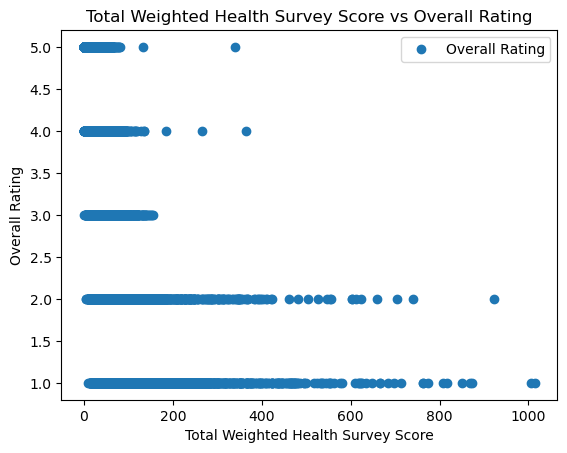

In [6]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Total Weighted Health Survey Score', y='Overall Rating',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Total Weighted Health Survey Score vs Overall Rating')  
plt.xlabel('Total Weighted Health Survey Score')  
plt.ylabel('Overall Rating')  
plt.show()

#### Hypothesis - The total weighted health survey score does not affect the overall rating.

In [7]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Total Weighted Health Survey Score'].values.reshape(-1,1)
y = df['Overall Rating'].values.reshape(-1,1)

In [8]:
X

array([[ 22.667],
       [ 48.667],
       [ 15.333],
       ...,
       [ 84.   ],
       [ 82.667],
       [149.5  ]])

In [9]:
y

array([[4.],
       [1.],
       [5.],
       ...,
       [1.],
       [2.],
       [1.]])

In [10]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 03. Regression analysis

In [11]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [12]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [13]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

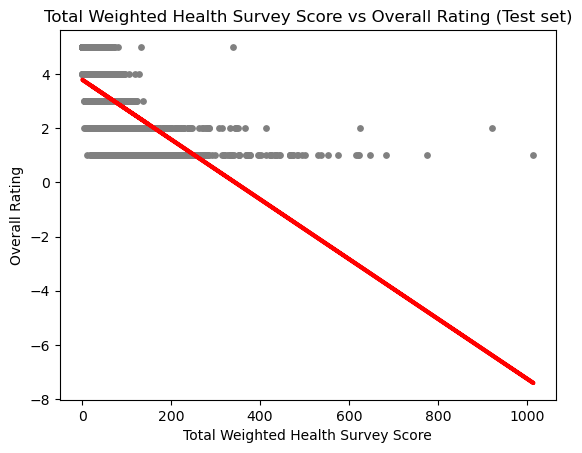

In [14]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total Weighted Health Survey Score vs Overall Rating (Test set)')
plot_test.xlabel('Total Weighted Health Survey Score')
plot_test.ylabel('Overall Rating')
plot_test.show()

#### The line does not fit the data points, as expected. However, the line slopes downward and runs to negative overall ratings, which is not expected. The slope here means as Total weighted health survey score increases, the overall rating decreases. This does not agree with the hypothesis.

In [23]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [16]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.01103209]]
Mean squared error:  1.378373214478311
R2 score:  0.30744691186058903


In [17]:
y_predicted

array([[3.50903057],
       [3.50167217],
       [3.78114813],
       ...,
       [3.41341544],
       [3.24426039],
       [2.1906957 ]])

In [18]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,4.0,3.509031
1,4.0,3.501672
2,5.0,3.781148
3,4.0,3.442838
4,3.0,3.641416
5,3.0,3.273672
6,3.0,2.970289
7,4.0,3.104517
8,1.0,-0.769589
9,4.0,3.663480


#### The table above confirms that the model is not accurate for making predictions.